In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from matplotlib.pyplot import rcParams

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

from config.definitions import ROOT_DIR
import os

In [2]:
plt.style.use('seaborn-whitegrid')

In [3]:
life = pd.read_csv(os.path.join(ROOT_DIR, 'data\\raw',
                   'life-expectancy-years.csv'))
life.tail()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
190,Samoa,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,...,79.8,79.9,80.0,80.1,80.3,80.4,80.5,80.6,80.7,80.8
191,Yemen,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,...,76.9,77.0,77.1,77.3,77.4,77.5,77.6,77.8,77.9,78.0
192,South Africa,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.4,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.5,77.7
193,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,75.8,76.0,76.1,76.3,76.4,76.5,76.7,76.8,77.0,77.1
194,Zimbabwe,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,33.7,...,73.3,73.4,73.5,73.7,73.8,73.9,74.0,74.2,74.3,74.4


In [4]:
life.isna()

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,2090,2091,2092,2093,2094,2095,2096,2097,2098,2099
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
191,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
193,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
new_life = life.dropna(how='any')  # drops rows\columns if ANY value is NaN
#Life = new_life.dropna(axis=1)
#Life
new_life.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 194
Columns: 302 entries, country to 2099
dtypes: float64(301), object(1)
memory usage: 440.3+ KB


In [6]:
#To check is there are any other missing values
count = pd.isnull(new_life['country'])
count.sum()

0

In [7]:
Life = new_life['2021'] #Isolate the data for only 2021

In [8]:
#colors = new_life.region.map({'Canada':'skyblue', 'Nigeria':'gold', 'China':'palegreen', 'India':'coral' })
rcParams['figure.figsize'] = 30, 10

needed_years = new_life[['country', '2000', '2001', '2002', '2003',
                         '2004', '2015', '2016', '2017', '2018', '2019', '2020', '2021']]
needed_years.head()

,country,2000,2001,2002,2003,2004,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,54.8,55.5,56.5,57.1,57.6,62.0,62.9,62.7,63.3,63.4,64.0,64.3
1,Angola,53.4,54.5,55.1,55.5,56.4,63.9,64.2,64.6,65.1,65.2,65.8,66.1
2,Albania,76.0,75.9,75.6,75.8,76.2,78.2,78.3,78.4,78.5,77.9,78.7,78.8
4,United Arab Emirates,69.2,69.4,69.3,69.1,69.2,73.4,73.5,73.7,73.9,74.0,74.2,74.3
5,Argentina,74.3,74.3,74.4,74.9,75.3,76.2,76.3,76.5,76.6,74.6,76.9,77.0


In [9]:
needed_years.set_index('country')

,2000,2001,2002,2003,2004,2015,2016,2017,2018,2019,2020,2021
country,,,,,,,,,,,,
Afghanistan,54.8,55.5,56.5,57.1,57.6,62.0,62.9,62.7,63.3,63.4,64.0,64.3
Angola,53.4,54.5,55.1,55.5,56.4,63.9,64.2,64.6,65.1,65.2,65.8,66.1
Albania,76.0,75.9,75.6,75.8,76.2,78.2,78.3,78.4,78.5,77.9,78.7,78.8
United Arab Emirates,69.2,69.4,69.3,69.1,69.2,73.4,73.5,73.7,73.9,74.0,74.2,74.3
Argentina,74.3,74.3,74.4,74.9,75.3,76.2,76.3,76.5,76.6,74.6,76.9,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Samoa,68.6,68.8,68.9,69.0,69.0,70.2,70.3,70.4,70.5,70.5,70.7,70.8
Yemen,64.0,64.5,64.9,65.3,65.8,67.5,67.3,66.1,67.7,67.8,67.9,68.0
South Africa,54.8,53.7,52.7,52.2,52.1,62.7,63.2,64.4,65.1,64.3,65.6,65.9


In [10]:
new_country = needed_years.loc[10:50]
new_country

,country,2000,2001,2002,2003,2004,2015,2016,2017,2018,2019,2020,2021
10,Azerbaijan,67.1,67.2,67.1,67.2,67.3,70.3,70.4,70.8,71.0,70.4,71.2,71.3
11,Burundi,45.8,46.9,47.9,49.2,50.3,62.4,63.0,63.4,63.8,64.0,64.5,64.9
12,Belgium,78.3,78.5,78.7,79.1,79.3,81.3,81.4,81.4,81.4,80.2,81.7,81.9
13,Benin,57.6,57.9,58.1,58.5,58.8,63.0,63.4,64.0,64.5,64.6,65.1,65.5
14,Burkina Faso,52.9,53.4,54.0,54.6,55.3,60.3,60.8,61.3,61.7,61.8,62.5,62.9
15,Bangladesh,66.0,66.3,66.7,67.1,67.4,73.9,73.9,74.2,74.5,74.7,75.1,75.4
16,Bulgaria,70.4,70.7,70.9,71.0,71.1,73.3,73.3,73.3,73.3,71.8,73.6,73.7
17,Bahrain,73.4,72.7,72.2,72.3,72.7,76.8,76.8,77.0,77.0,76.3,77.3,77.4
18,Bahamas,71.3,71.9,72.4,72.4,73.2,73.7,73.8,73.8,73.4,72.3,73.6,73.7
19,Bosnia and Herzegovina,75.3,75.1,75.3,75.5,75.3,76.7,76.8,76.9,77.0,75.4,77.3,77.4


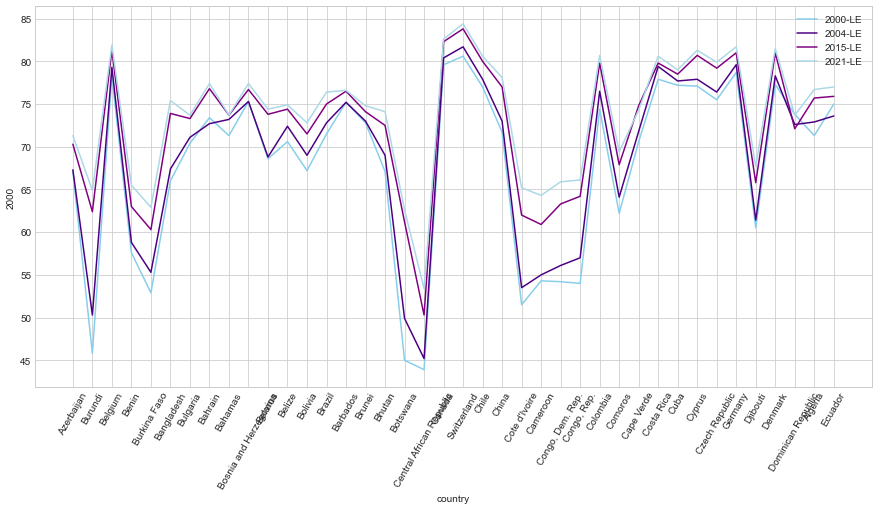

In [11]:
rcParams['figure.figsize'] = 15, 7

sb.lineplot(data=new_country, y='2000', x='country',
            color='skyblue', label='2000-LE')
sb.lineplot(data=new_country, y='2004', x='country',
            color='indigo', label='2004-LE')
sb.lineplot(data=new_country, y='2015', x='country',
            color='purple', label='2015-LE')
sb.lineplot(data=new_country, y='2021', x='country',
            color='lightblue', label='2021-LE')

plt.xticks(rotation=60, fontsize='medium')


plt.legend(loc='best')
plt.show()

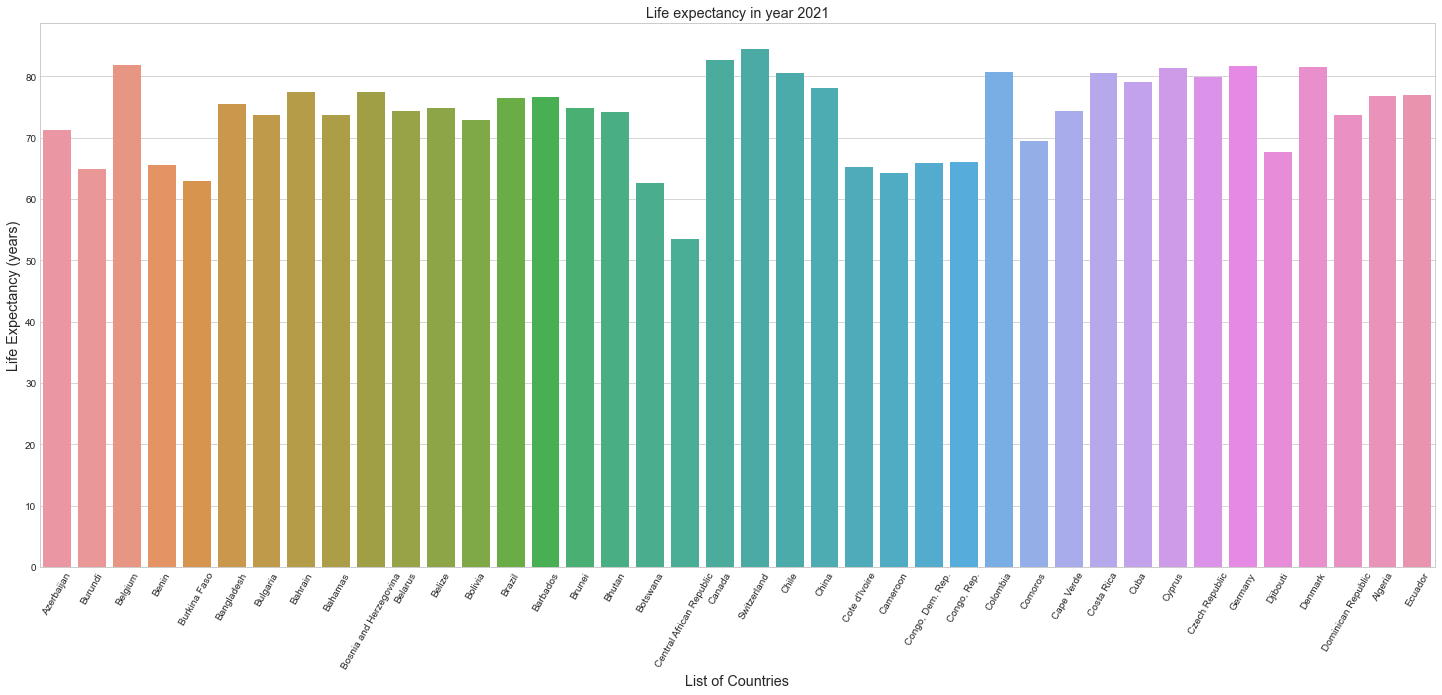

In [12]:
bar, ax = plt.subplots(figsize=(25, 10))
ax = sb.barplot(x='country', y='2021', data=new_country)
ax.set_title('Life expectancy in year 2021', fontsize='x-large')
ax.set_xlabel('List of Countries', fontsize='x-large')
ax.set_ylabel('Life Expectancy (years)', fontsize='x-large')
#ax.bar_label(ax.add_container[0])

plt.xticks(rotation=60)
#plt.tight_layout()
plt.show()